In [1]:
import tensorflow as tf
import keras
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [2]:
BATCH_SIZE = 1
IMAGE_SIZE = 150
CHANNELS=3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "images",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 39000 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['insan', 'kedi', 'kopek']

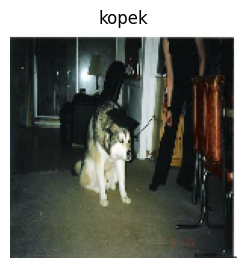

In [6]:
plt.figure(figsize=(10, 10))
i = 0  # To keep track of how many images have been plotted
for image_batch, labels_batch in dataset.take(1):  # Take only the first 2 batches
    for i in range(len(image_batch)):  # Iterate over each image in the batch
        if i < 9:  # We only want to plot 9 images
            ax = plt.subplot(3, 3, i + 1)  # Arrange plots in 3x3 grid
            plt.imshow(image_batch[i].numpy().astype("uint8"))
            plt.title(class_names[labels_batch[i]])
            plt.axis("off")
            i += 1
        else:
            break
plt.show()



In [7]:
len(dataset)

39000

In [8]:
def get_dataset_partitions_tf(ds, train_split=0.7, val_split=0.15, test_split=0.15, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [9]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [10]:
print(f"Eğitim Seti boyutu: {len(train_ds)}")
print(f"Doğrulama(Validation) Seti boyutu: {len(val_ds)}")
print(f"Test  Seti boyutu: {len(test_ds)}")


Eğitim Seti boyutu: 27300
Doğrulama(Validation) Seti boyutu: 5850
Test  Seti boyutu: 5850


In [13]:
resize_and_rescale = keras.Sequential([
    keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    keras.layers.Rescaling(1./255),
])

In [16]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = keras.models.Sequential([
    resize_and_rescale,
    keras.layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [17]:
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (1, 150, 150, 3)          0         
                                                                 
 conv2d (Conv2D)             (1, 148, 148, 32)         896       
                                                                 
 max_pooling2d (MaxPooling2D  (1, 74, 74, 32)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (1, 72, 72, 64)           18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (1, 36, 36, 64)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (1, 34, 34, 64)          

In [18]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [19]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=15,
)

Epoch 1/15
27300/27300 [==============================] - 155s 6ms/step - loss: 0.5611 - accuracy: 0.6946 - val_loss: 0.3755 - val_accuracy: 0.8109
Epoch 2/15
27300/27300 [==============================] - 168s 6ms/step - loss: 0.3879 - accuracy: 0.8084 - val_loss: 0.3365 - val_accuracy: 0.8294
Epoch 3/15
27300/27300 [==============================] - 204s 7ms/step - loss: 0.3310 - accuracy: 0.8489 - val_loss: 0.3751 - val_accuracy: 0.8154
Epoch 4/15
27300/27300 [==============================] - 197s 7ms/step - loss: 0.2875 - accuracy: 0.8723 - val_loss: 0.3052 - val_accuracy: 0.8838
Epoch 5/15
27300/27300 [==============================] - 193s 7ms/step - loss: 0.2695 - accuracy: 0.8823 - val_loss: 0.2157 - val_accuracy: 0.9055
Epoch 6/15
27300/27300 [==============================] - 190s 7ms/step - loss: 0.2578 - accuracy: 0.8925 - val_loss: 0.2036 - val_accuracy: 0.9116
Epoch 7/15
27300/27300 [==============================] - 198s 7ms/step - loss: 0.2476 - accuracy: 0.8980 - val_

In [20]:
scores = model.evaluate(test_ds)

5850/5850 [==============================] - 37s 3ms/step - loss: 0.2388 - accuracy: 0.9056


In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [22]:
acc

[0.6945787668228149,
 0.8083882927894592,
 0.8489377498626709,
 0.8723443150520325,
 0.8823077082633972,
 0.8925274610519409,
 0.8979853391647339,
 0.8990842700004578,
 0.9038461446762085,
 0.8996703028678894,
 0.9041758179664612,
 0.903296709060669,
 0.9015750885009766,
 0.9041392207145691,
 0.9044688940048218]

In [23]:
val_acc

[0.810940146446228,
 0.8294017314910889,
 0.8153846263885498,
 0.8837606906890869,
 0.905470073223114,
 0.9116239547729492,
 0.9138461351394653,
 0.9078632593154907,
 0.9205127954483032,
 0.9201709628105164,
 0.9189743399620056,
 0.9099145531654358,
 0.8661538362503052,
 0.9153845906257629,
 0.9023931622505188]

In [36]:
loss

[0.5610895156860352,
 0.38787999749183655,
 0.33097052574157715,
 0.2874622642993927,
 0.269491046667099,
 0.2578253746032715,
 0.24760518968105316,
 0.245263934135437,
 0.23576059937477112,
 0.26734423637390137,
 0.23556827008724213,
 0.24177449941635132,
 0.25803640484809875,
 0.24186457693576813,
 0.2423725128173828]

In [37]:
val_loss

[0.3755015432834625,
 0.33646252751350403,
 0.3750649094581604,
 0.3051968216896057,
 0.21570391952991486,
 0.20363673567771912,
 0.20686475932598114,
 0.21400073170661926,
 0.1989443600177765,
 0.19699501991271973,
 0.19859474897384644,
 0.46404942870140076,
 0.2677011489868164,
 0.2077987641096115,
 0.2504725754261017]

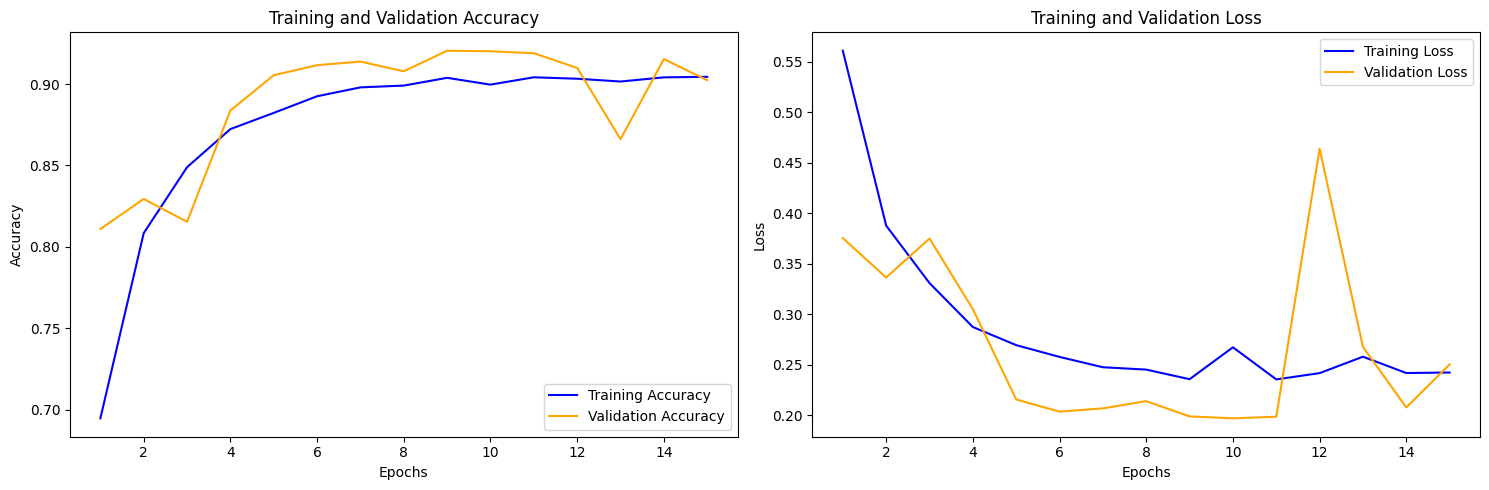

In [24]:

epochs = list(range(1, 16))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(epochs, acc, label='Training Accuracy', color='blue')
ax1.plot(epochs, val_acc, label='Validation Accuracy', color='orange')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(epochs, loss, label='Training Loss', color='blue')
ax2.plot(epochs, val_loss, label='Validation Loss', color='orange')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()


tahmin edilecek ilk görüntü
gerçek label: insan
1/1 [==============================] - 0s 23ms/step
tahmin label: insan


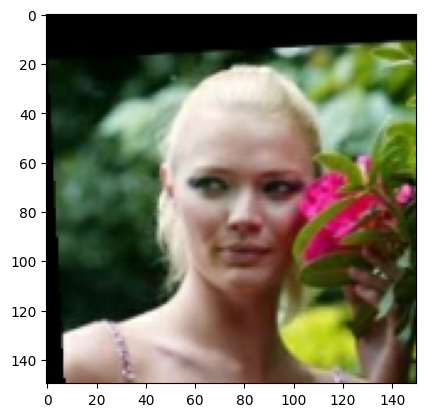

In [33]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("tahmin edilecek ilk görüntü")
    plt.imshow(first_image)
    print("gerçek label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("tahmin label:",class_names[np.argmax(batch_prediction[0])])

1/1 [==============================] - 0s 18ms/step


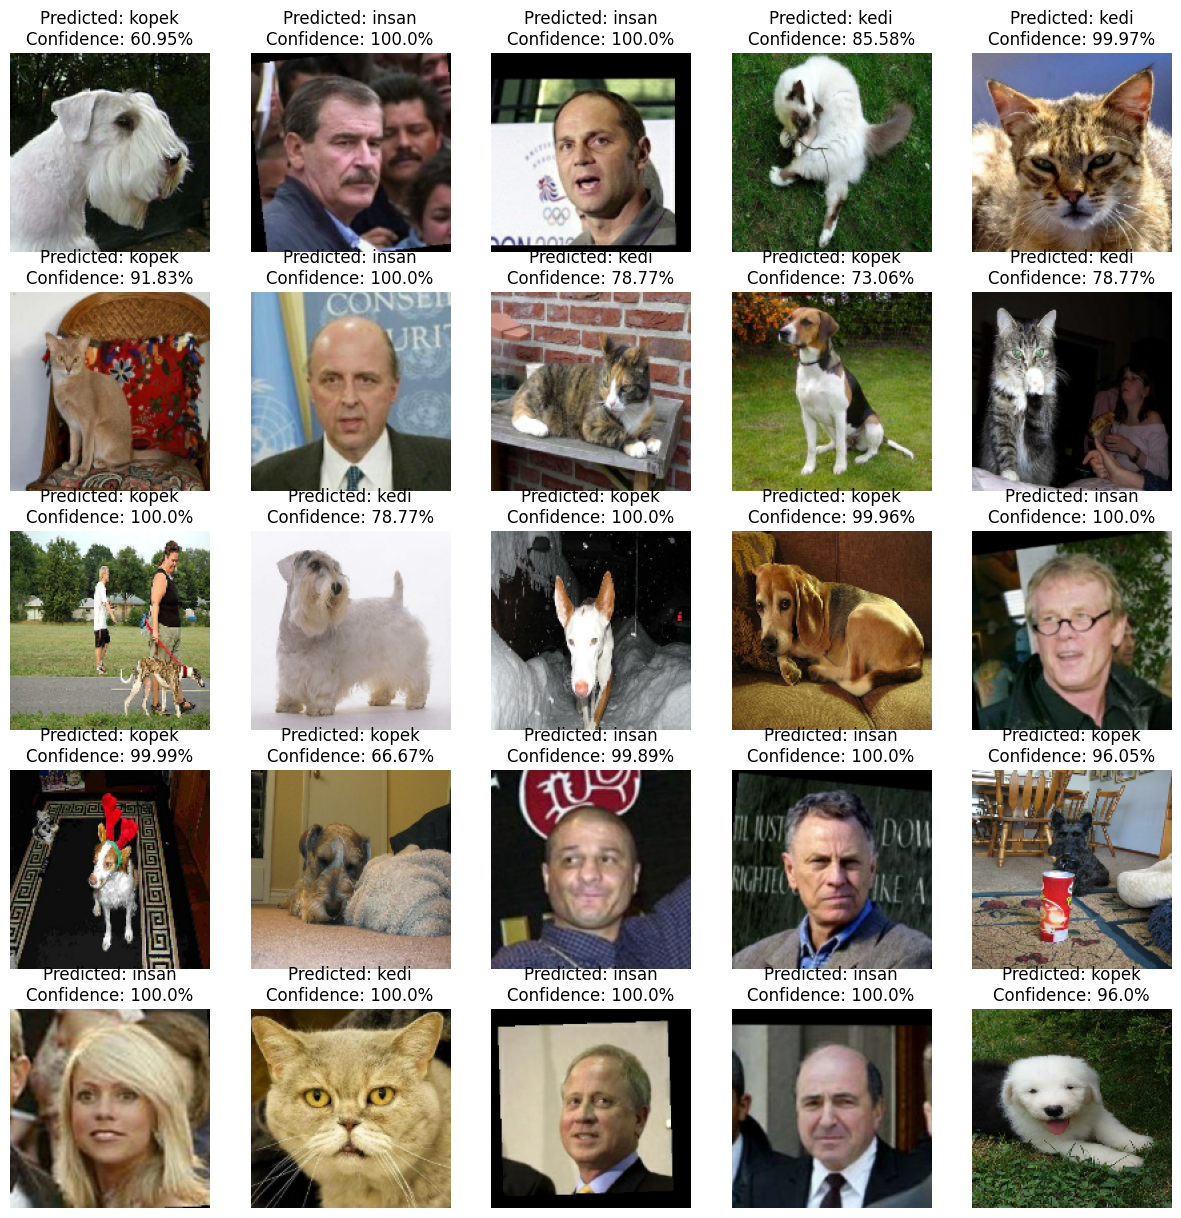

In [72]:
def predict_and_plot(model, dataset, class_names, num_images=25):
    plt.figure(figsize=(15, 15))
    image_count = 0
    
    shuffled_dataset = dataset.shuffle(1000).take(num_images)
    
    for image_batch, labels_batch in shuffled_dataset:
        indices = np.random.choice(range(len(image_batch)), min(len(image_batch), num_images - image_count), replace=False)
        
        for i in indices:
            img_array = tf.keras.preprocessing.image.img_to_array(image_batch[i].numpy())
            img_array = tf.expand_dims(img_array, 0)
            
            predictions = model.predict(img_array)
            predicted_class = class_names[np.argmax(predictions[0])]
            confidence = round(100 * np.max(predictions[0]), 2)
            
            ax = plt.subplot(5, 5, image_count + 1)
            plt.imshow(image_batch[i].numpy().astype("uint8"))
            plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence}%")
            plt.axis("off")
            
            image_count += 1
            if image_count == num_images:
                plt.show()
                return
                
predict_and_plot(model, dataset, class_names)
